<a href="https://colab.research.google.com/github/muppiit/PengolahanCitra_dan_VisiKomputer/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow

original_img = cv2.imread('/content/drive/MyDrive/PCVK/Assets/female.tiff')

# 1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 5


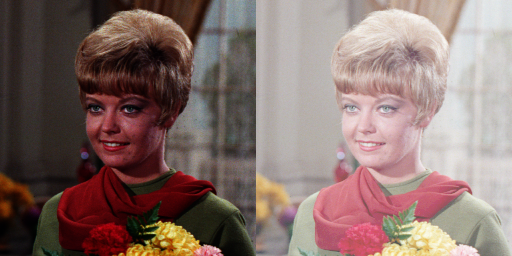

In [3]:
def gamma_correction(image, gamma):
  invGamma = 1.0/gamma
  table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")
  return cv2.LUT(image, table)

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

gamma_img = gamma_correction(original_img, gamma)
cv2_imshow(cv2.hconcat([original_img, gamma_img]))

# 2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 2^7 = 128, dst.

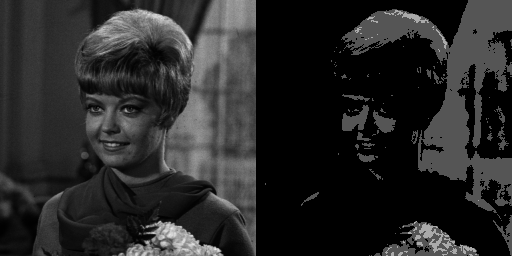

In [4]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
gray_image = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
depth_image = np.zeros(gray_image.shape, gray_image.dtype)
depth_image = (np.floor(gray_image / level) * level).astype('uint8')
cv2_imshow(cv2.hconcat([gray_image, depth_image]))

# 3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg

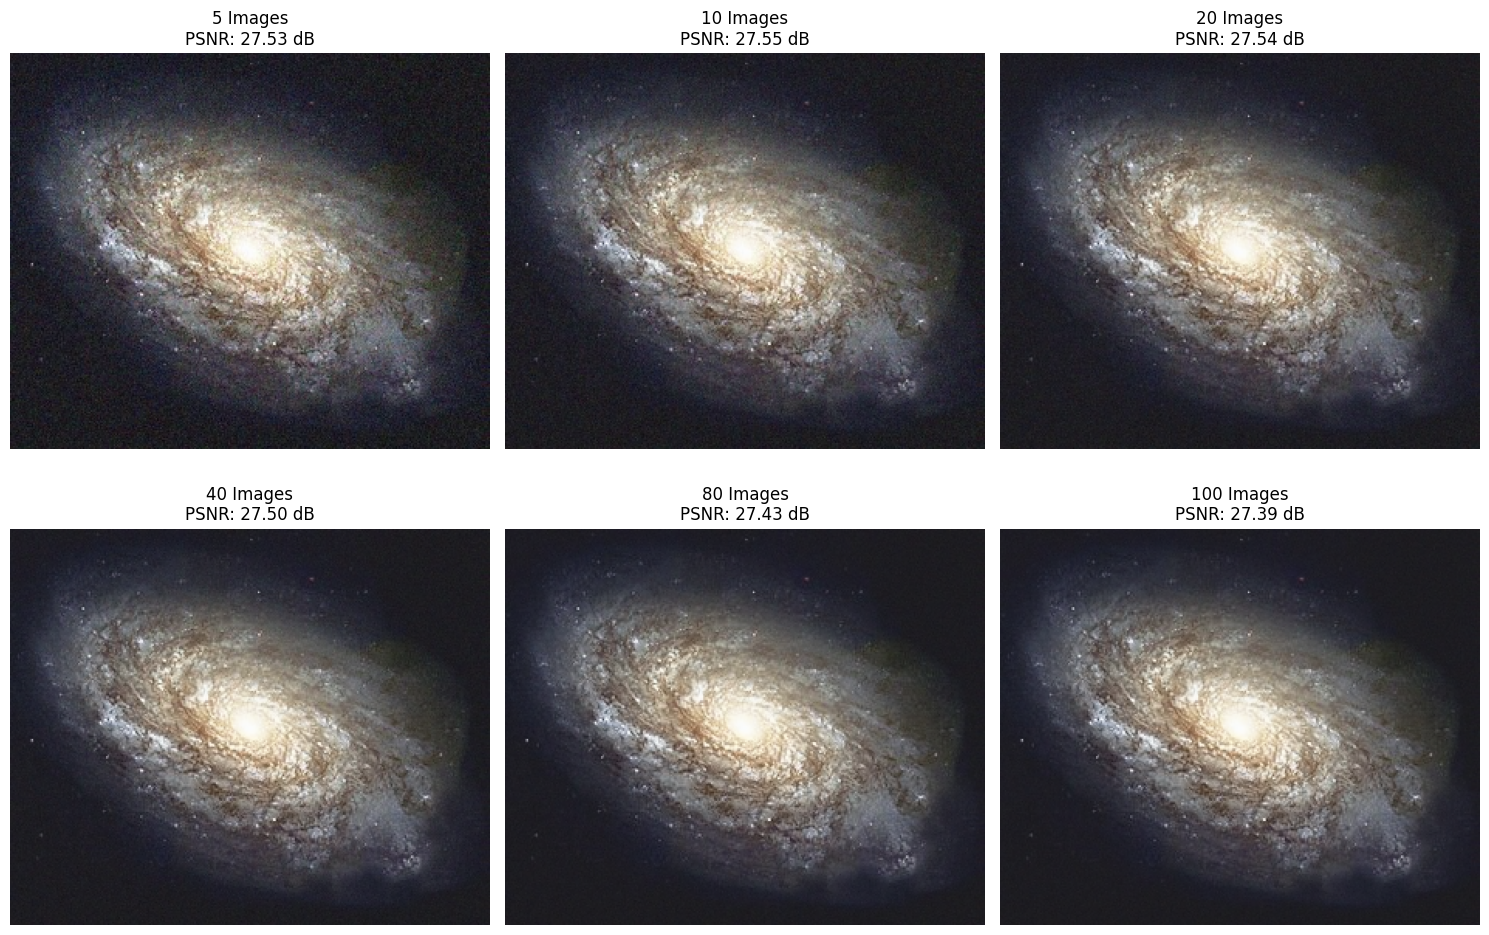

In [8]:
import glob
import matplotlib.pyplot as plt
from math import log10, sqrt

original_img = cv2.imread('/content/drive/MyDrive/PCVK/Assets/galaxy.jpg')

# Fungsi untuk menghitung PSNR antara dua gambar
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100  # Jika MSE adalah 0, gambar identik
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Assets/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

rows = 2
cols = 3

test_images_counts = [5, 10, 20, 40, 80, 100]
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

for index, num_images in enumerate(test_images_counts):
    average_img = np.zeros(cv_img[0].shape, np.float32)

    for i in range(num_images):
        average_img += cv_img[i].astype(np.float32)

    denoised_img = average_img / num_images
    denoised_img = cv2.convertScaleAbs(denoised_img)

    psnr_value = PSNR(original_img, denoised_img)

    row = index // cols
    col = index % cols

    axs[row, col].imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
    axs[row, col].set_title(f'{num_images} Images\nPSNR: {psnr_value:.2f} dB')
    axs[row, col].axis('off')

for idx in range(len(test_images_counts), rows * cols):
    row = idx // cols
    col = idx % cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


# 4. Buat image masking


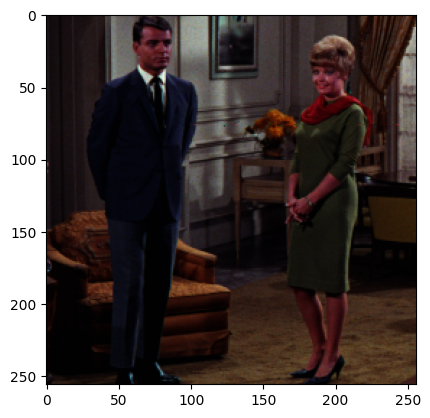

In [9]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Assets/couple.tiff')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

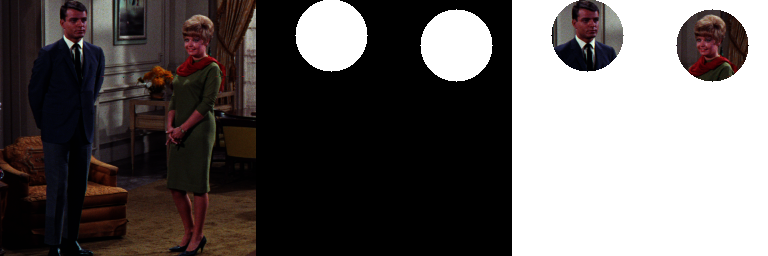

In [18]:
mask = np.zeros(img.shape[:2], dtype=np.uint8)
# Mask with white circle
cv2.circle(mask, (75, 35), 36, 255, -1)
cv2.circle(mask, (200, 45), 36, 255, -1)
# Convert grayscale to 3 channels
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Make white background
white_background = np.ones_like(img) * 255
# Apply the mask to retain the original image pixels inside the mask and set the background to white
masked_image = np.where(mask == 255, img, white_background)

cv2_imshow(cv2.hconcat([img, mask, masked_image]))

# 5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya

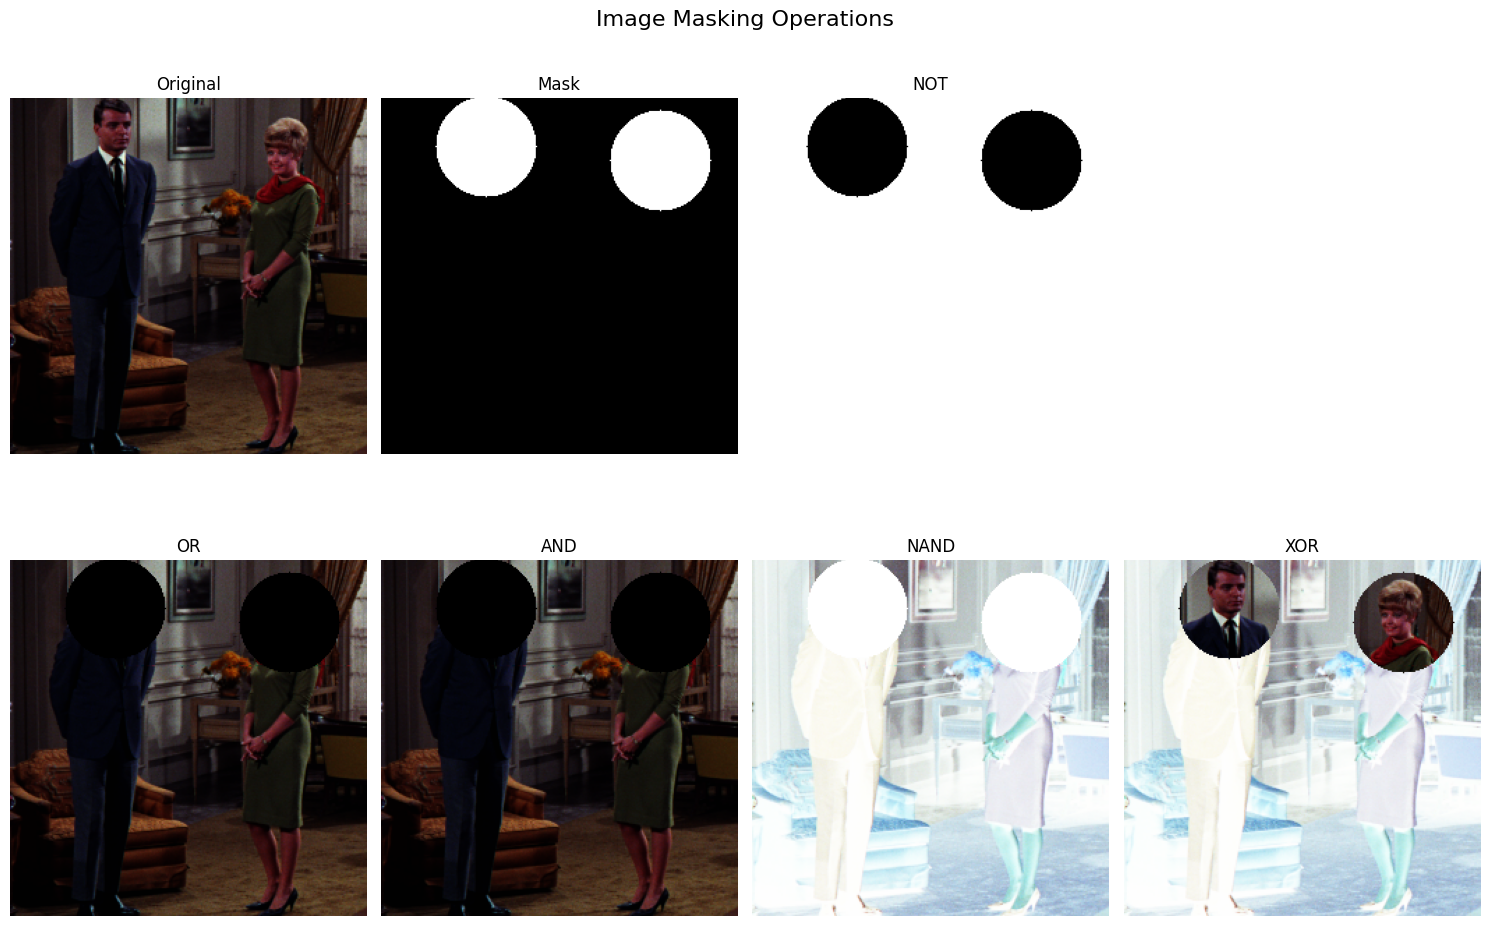

In [19]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Assets/couple.tiff')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# MASK
mask = np.zeros(img.shape[:2], dtype=np.uint8) * 255
cv2.circle(mask, (75, 35), 36, 255, -1)
cv2.circle(mask, (200, 45), 36, 255, -1)

# NOT
not_result = cv2.bitwise_not(mask)

# OR
or_result = cv2.bitwise_or(img, img, mask=cv2.bitwise_not(mask))

# AND
and_result = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask))

# NAND
nand_result = cv2.bitwise_not(cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask)))

# XOR
xor_result = cv2.bitwise_xor(img, cv2.cvtColor(cv2.bitwise_not(mask), cv2.COLOR_GRAY2RGB))

# Persiapkan plot
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
fig.suptitle('Image Masking Operations', fontsize=16)

# Tampilkan hasil
axs[0, 0].imshow(img)
axs[0, 0].set_title('Original')
axs[0, 1].imshow(mask, cmap='gray')
axs[0, 1].set_title('Mask')
axs[0, 2].imshow(not_result, cmap='gray')
axs[0, 2].set_title('NOT')
axs[1, 0].imshow(or_result)
axs[1, 0].set_title('OR')
axs[1, 1].imshow(and_result)
axs[1, 1].set_title('AND')
axs[1, 2].imshow(nand_result)
axs[1, 2].set_title('NAND')
axs[1, 3].imshow(xor_result)
axs[1, 3].set_title('XOR')

# Hapus axis
for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

- NOT tidak akan menampilkan gambar
- OR akan menampilkan gambar asli di luar lingkaran hitam.
- AND akan menampilkan gambar asli hanya di dalam lingkaran hitam.
- NAND akan menampilkan inversi dari AND.
- XOR akan menampilkan inversi gambar di dalam lingkaran dan gambar asli di luar.